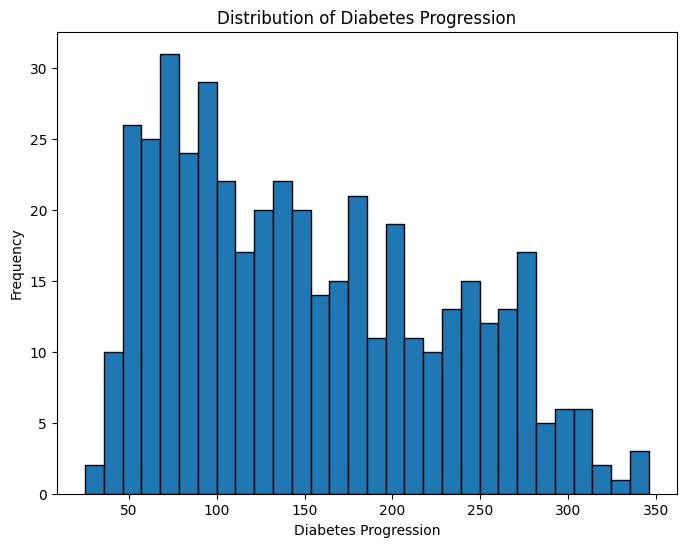

<Figure size 1000x800 with 0 Axes>

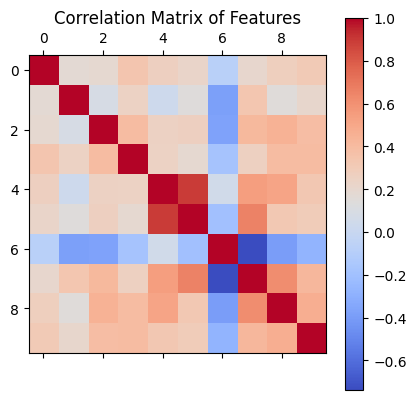

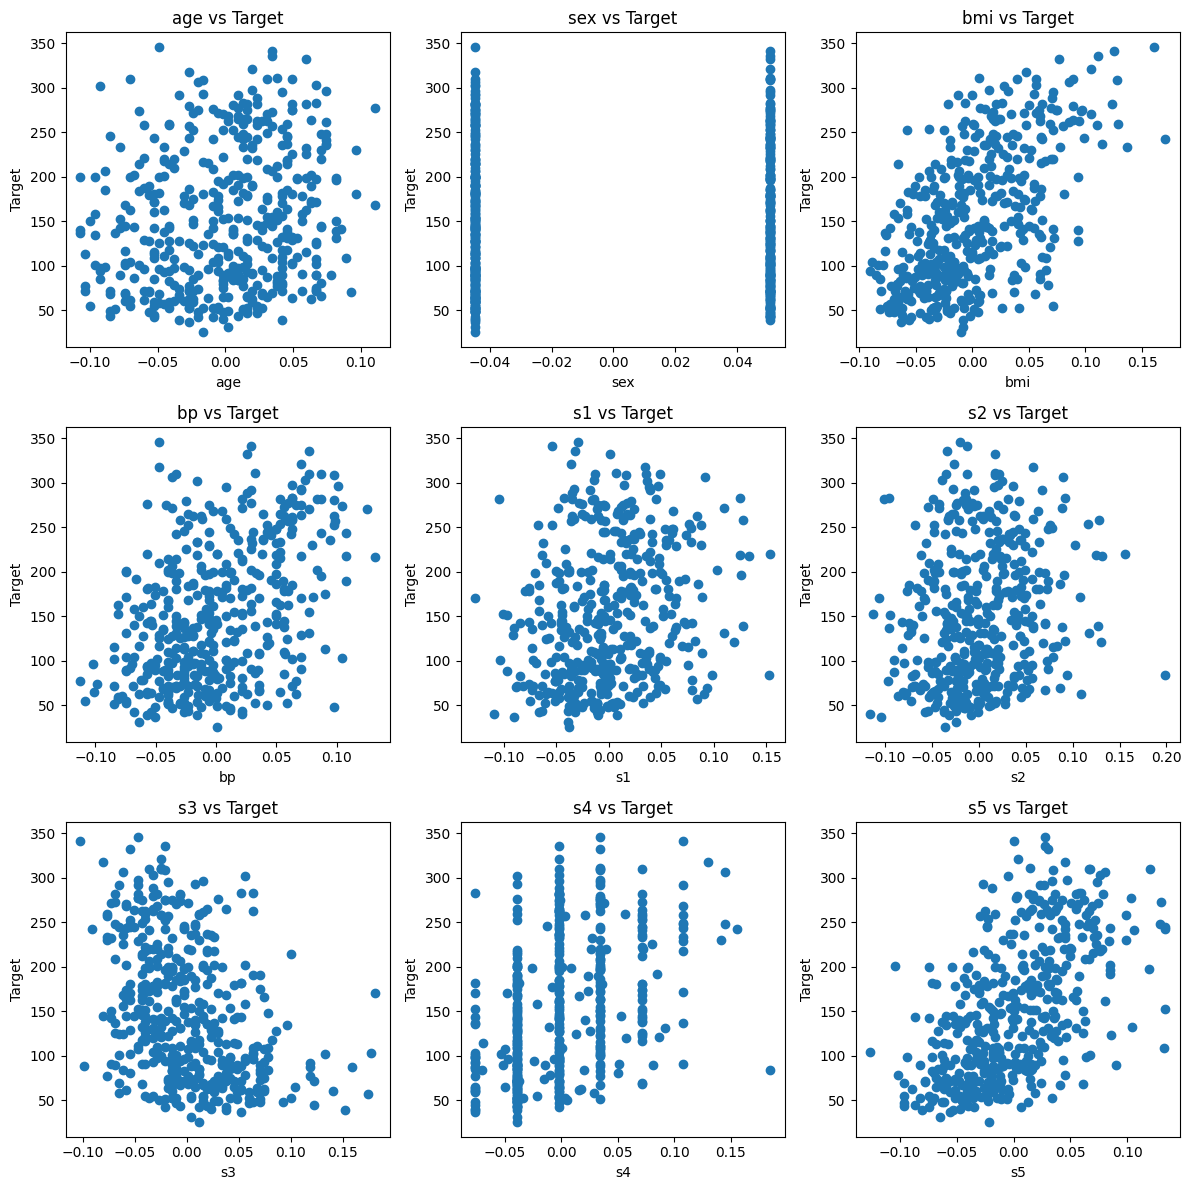

Mean Squared Error: 2900.193628493482
R² Score: 0.45260276297191937


In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed.drop('target', axis=1))
y = df_imputed['target']

plt.figure(figsize=(8,6))
plt.hist(y, bins=30, edgecolor='black')
plt.title('Distribution of Diabetes Progression')
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')
plt.show()

corr_matrix = df_imputed.drop('target', axis=1).corr()
plt.figure(figsize=(10,8))
plt.matshow(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.colorbar()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.ravel()

# Now, we only iterate over the first 9 features (since we have 9 axes in a 3x3 grid)
for i, feature in enumerate(df_imputed.drop('target', axis=1).columns):
    if i < 9:  # Ensure we don't go out of bounds
        axes[i].scatter(df_imputed[feature], y)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Target')
        axes[i].set_title(f'{feature} vs Target')

plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
